In [1]:
import numpy as np
import pandas as pd
import os
from collections import Counter
# used for data visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#used for prediction
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
cwd = os.getcwd()

In [2]:
# Read data
path = cwd + "/SMSSpamCollection"

with open(path) as file:
    data = file.readlines()

data = list(map(lambda line: line.strip().split("\t"),data))
data_df = pd.DataFrame(data,columns=["Tag","Message"])
spam_data_df = data_df[data_df.Tag == "spam"]
ham_data_df = data_df[data_df.Tag == "ham"]
#print(data_df)

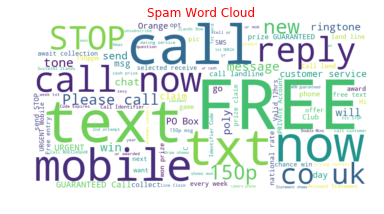

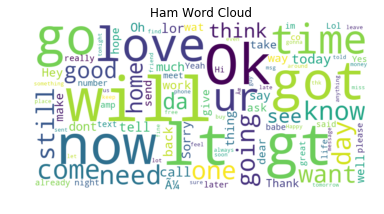

In [3]:
#Plot the Word Cloud for each category
stopwords = set(STOPWORDS)
spam_wc = WordCloud(width=800, 
                    height = 400,
                    stopwords=stopwords,
                    max_words=100, 
                    background_color="white").generate(" ".join(spam_data_df["Message"].tolist()))

ham_wc = WordCloud(width=800, 
                   height = 400,
                   stopwords=stopwords,
                   max_words=100, 
                   background_color="white").generate(" ".join(ham_data_df["Message"].tolist()))

plt.imshow(spam_wc,interpolation='bilinear')
plt.axis("off")
plt.getp(plt.title("Spam Word Cloud"),'text')
plt.setp(plt.title("Spam Word Cloud"),color = 'r')
plt.show()
spam_wc.to_file(cwd+"/spam_word_cloud.png")
plt.imshow(ham_wc,interpolation='bilinear')
plt.axis("off")
plt.getp(plt.title("Ham Word Cloud"),'text')
plt.show()
ham_wc.to_file(cwd+"/ham_word_cloud.png")

In [4]:
#split data
X_train_data,X_test_data, Y_train_data, Y_test_data =  train_test_split(data_df["Message"], data_df["Tag"], test_size = 0.1)

In [5]:
#convert data
v=DictVectorizer(sparse=False)
train_dictionary= list(map(lambda line:dict(Counter(line)),(list(map(lambda line:line.strip().split(),X_train_data.tolist())))))
train_bag_of_words = v.fit_transform(train_dictionary)

test_dictionary= list(map(lambda line:dict(Counter(line)),(list(map(lambda line:line.strip().split(),X_test_data.tolist())))))
test_bag_of_words = v.transform(test_dictionary)

categories = {"spam":1, "ham":0}
Y_train_data.replace(categories,inplace = True)
Y_test_data.replace(categories,inplace = True)

In [6]:
clf = GaussianNB()
clf.fit(train_bag_of_words,Y_train_data.tolist())

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
Y_pred = clf.predict(test_bag_of_words)
precision_recall_fscore_support(Y_test_data, Y_pred,labels=[0, 1])

(array([0.99559471, 0.74038462]),
 array([0.94363257, 0.97468354]),
 array([0.96891747, 0.84153005]),
 array([479,  79], dtype=int64))